In [1]:
from enum import Enum

class Source(Enum):
    WORLDCLIM = 1
    GLOBE = 2

In [2]:
print("This will be it %s " % list(Source.__members__))

This will be it ['WORLDCLIM', 'GLOBE'] 


In [3]:
import rasterio
tmax_january = rasterio.open("/home/daniela/git/iSDM/data/tmax1/tmax1.bil")

In [4]:
tmax_january.bounds # it's part of the metadata (header) MinX MinY MaxX MaxY

BoundingBox(left=-180.00000000000335, bottom=-60.000000000001165, right=179.9999999999995, top=90.00000000000003)

In [5]:
tmax_january.get_nodatavals() # also metadata

[-9999.0]

In [6]:
tmax_january.crs

{'init': 'epsg:4326'}

In [7]:
tmax_january.height # NROWS metadata

3600

In [8]:
tmax_january.lnglat()

(-1.9326762412674725e-12, 14.999999999999432)

In [9]:
tmax_january.res  # pixel size? XDIM YDIM metadata

(0.041666666666667, 0.041666666666667)

In [10]:
tmax_january.meta # awesome!

{'affine': Affine(0.041666666666667, 0.0, -180.00000000000335,
       0.0, -0.041666666666667, 90.00000000000003),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'EHdr',
 'dtype': 'int16',
 'height': 3600,
 'nodata': -9999.0,
 'transform': (-180.00000000000335,
  0.041666666666667,
  0.0,
  90.00000000000003,
  0.0,
  -0.041666666666667),
 'width': 8640}

In [11]:
tmax_january.meta['transform']

(-180.00000000000335,
 0.041666666666667,
 0.0,
 90.00000000000003,
 0.0,
 -0.041666666666667)

In [12]:
tmax_january.sample(0.4)

<generator object sample_gen at 0x7fe5f06d2438>

In [13]:
npixels = tmax_january.width * tmax_january.height
for i in tmax_january.indexes:
    band = tmax_january.read(i)
    print(i, band[band!=tmax_january.nodata].min(), band.max(), band.sum()/npixels)

1 -489 419 -7087.92549322


In [14]:
npixels

31104000

In [15]:
for key in tmax_january.meta.keys():
    print(key,":",tmax_january.meta[key])

transform : (-180.00000000000335, 0.041666666666667, 0.0, 90.00000000000003, 0.0, -0.041666666666667)
count : 1
driver : EHdr
width : 8640
height : 3600
dtype : int16
nodata : -9999.0
crs : {'init': 'epsg:4326'}
affine : | 0.04, 0.00,-180.00|
| 0.00,-0.04, 90.00|
| 0.00, 0.00, 1.00|


In [16]:
print(tmax_january.read())

[[[-9999 -9999 -9999 ..., -9999 -9999 -9999]
  [-9999 -9999 -9999 ..., -9999 -9999 -9999]
  [-9999 -9999 -9999 ..., -9999 -9999 -9999]
  ..., 
  [-9999 -9999 -9999 ..., -9999 -9999 -9999]
  [-9999 -9999 -9999 ..., -9999 -9999 -9999]
  [-9999 -9999 -9999 ..., -9999 -9999 -9999]]]


In [17]:
print(tmax_january.meta)

{'transform': (-180.00000000000335, 0.041666666666667, 0.0, 90.00000000000003, 0.0, -0.041666666666667), 'count': 1, 'driver': 'EHdr', 'width': 8640, 'height': 3600, 'dtype': 'int16', 'nodata': -9999.0, 'crs': {'init': 'epsg:4326'}, 'affine': Affine(0.041666666666667, 0.0, -180.00000000000335,
       0.0, -0.041666666666667, 90.00000000000003)}


In [18]:
import json
print(json.dumps(tmax_january.meta, indent=2))

{
  "transform": [
    -180.00000000000335,
    0.041666666666667,
    0.0,
    90.00000000000003,
    0.0,
    -0.041666666666667
  ],
  "count": 1,
  "driver": "EHdr",
  "width": 8640,
  "height": 3600,
  "dtype": "int16",
  "nodata": -9999.0,
  "crs": {
    "init": "epsg:4326"
  },
  "affine": [
    0.041666666666667,
    0.0,
    -180.00000000000335,
    0.0,
    -0.041666666666667,
    90.00000000000003,
    0.0,
    0.0,
    1.0
  ]
}


In [19]:
 import pprint

In [20]:
pp = pprint.PrettyPrinter(depth=6)

In [21]:
print(pp.pprint(tmax_january.meta))

{'affine': Affine(0.041666666666667, 0.0, -180.00000000000335,
       0.0, -0.041666666666667, 90.00000000000003),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'EHdr',
 'dtype': 'int16',
 'height': 3600,
 'nodata': -9999.0,
 'transform': (-180.00000000000335,
               0.041666666666667,
               0.0,
               90.00000000000003,
               0.0,
               -0.041666666666667),
 'width': 8640}
None


In [3]:
temperature_max_january.load_data()

Loaded data from /home/daniela/git/iSDM/data/tmax1/tmax1.bil 
Metadata: {'affine': Affine(0.041666666666667, 0.0, -180.00000000000335,
       0.0, -0.041666666666667, 90.00000000000003),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'EHdr',
 'dtype': 'int16',
 'height': 3600,
 'nodata': -9999.0,
 'transform': (-180.00000000000335,
               0.041666666666667,
               0.0,
               90.00000000000003,
               0.0,
               -0.041666666666667),
 'width': 8640} 
Resolution: (0.041666666666667, 0.041666666666667) 
Bounds: BoundingBox(left=-180.00000000000335, bottom=-60.000000000001165, right=179.9999999999995, top=90.00000000000003) 


array([[[-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        ..., 
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999]]], dtype=int16)

In [4]:
pp.pformat(tmax_january.meta)

NameError: name 'pp' is not defined

In [18]:
from rasterio.warp import calculate_default_transform, reproject, RESAMPLING

import numpy as np
destination = np.zeros(tmax_january.read(1).shape, np.uint8)
source=rasterio.band(tmax_january, 1)
band = tmax_january.read()

NameError: name 'tmax_january' is not defined

In [19]:
affine, width, height = calculate_default_transform(src_crs=tmax_january.crs, 
                            dst_crs=tmax_january.crs, 
                            width=tmax_january.width, 
                            height=tmax_january.height, 
                            left=tmax_january.bounds.left,
                            bottom=tmax_january.bounds.bottom,
                            right=tmax_january.bounds.right,
                            top=tmax_january.bounds.top,
                            resolution=5) # CHNGE RESOLUTION

NameError: name 'tmax_january' is not defined

In [122]:
destination = np.zeros((height,width), np.int16)

In [123]:
reproject(source=source, 
          destination=destination, src_transform=tmax_january.affine, 
          src_crs=tmax_january.crs, 
          dst_transform=affine, 
          dst_crs=tmax_january.crs, 
          resampling=RESAMPLING.nearest)

In [25]:
destination.shape

NameError: name 'destination' is not defined

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(destination, cmap="hot", interpolation="none")

NameError: name 'destination' is not defined

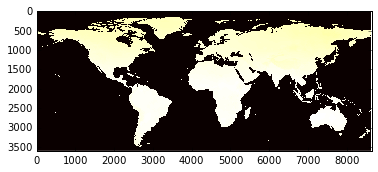

In [104]:
plt.imshow(band[0], cmap="hot", interpolation="none")

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import logging
import numpy as np
root = logging.getLogger()
root.addHandler(logging.StreamHandler())

from iSDM.environment import ClimateLayer
temperature_max_january = ClimateLayer(file_path="/home/daniela/git/iSDM/data/tmax1/tmax1.bil")
temperature_max_january.load_dataset()

Loading data from /home/daniela/git/iSDM/data/tmax1/tmax1.bil 
Metadata: {'affine': Affine(0.041666666666667, 0.0, -180.00000000000335,
       0.0, -0.041666666666667, 90.00000000000003),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'EHdr',
 'dtype': 'int16',
 'height': 3600,
 'nodata': -9999.0,
 'transform': (-180.00000000000335,
               0.041666666666667,
               0.0,
               90.00000000000003,
               0.0,
               -0.041666666666667),
 'width': 8640} 
Resolution: (0.041666666666667, 0.041666666666667) 
Bounds: BoundingBox(left=-180.00000000000335, bottom=-60.000000000001165, right=179.9999999999995, top=90.00000000000003) 
Dataset loaded. Use .read() or .read_masks() to access the layers.


<open RasterReader name='/home/daniela/git/iSDM/data/tmax1/tmax1.bil' mode='r'>

In [2]:
temperature_max_january.reproject(destination_file="./here.tif", resolution=10, dst_crs='EPSG:4326')

Calculated default transformation:
Affine:
| 10.00, 0.00,-180.00|
| 0.00,-10.00, 90.00|
| 0.00, 0.00, 1.00| 
 width=37, height=16
Reprojected data in ./here.tif 


In [3]:
temperature_max_january.get_data().read()

array([[[-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        ..., 
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999]]], dtype=int16)

In [4]:
import rasterio
here = rasterio.open("./here.tif")

In [5]:
here.read().shape

(1, 16, 37)

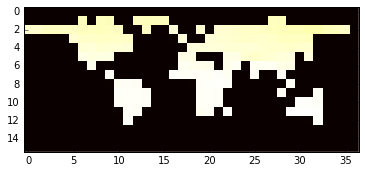

In [6]:
plt.imshow(here.read()[0], cmap="hot", interpolation="none")

In [7]:
original_data = temperature_max_january.load_dataset()

Loading data from /home/daniela/git/iSDM/data/tmax1/tmax1.bil 
Metadata: {'affine': Affine(0.041666666666667, 0.0, -180.00000000000335,
       0.0, -0.041666666666667, 90.00000000000003),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'EHdr',
 'dtype': 'int16',
 'height': 3600,
 'nodata': -9999.0,
 'transform': (-180.00000000000335,
               0.041666666666667,
               0.0,
               90.00000000000003,
               0.0,
               -0.041666666666667),
 'width': 8640} 
Resolution: (0.041666666666667, 0.041666666666667) 
Bounds: BoundingBox(left=-180.00000000000335, bottom=-60.000000000001165, right=179.9999999999995, top=90.00000000000003) 
Dataset loaded. Use .read() or .read_masks() to access the layers.


In [8]:
original_data.shape

(3600, 8640)

In [9]:
here.read_masks()

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0, 255,   0, 255, 255,   0,   0, 255,
         255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0,
         255,   0,   0, 255,   0,   0, 255,   0, 255, 255, 255, 255, 255,
         255, 255, 255, 255, 255, 255, 255, 255, 255, 255,   0],
        [  0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255,   0,
           0,   0,   0,   0, 255,   0,   0, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255,   0,
           0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255,


In [10]:
here.meta

{'affine': Affine(10.0, 0.0, -180.000000000003,
       0.0, -10.0, 90.0),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'EHdr',
 'dtype': 'int16',
 'height': 16,
 'nodata': -9999.0,
 'transform': (-180.000000000003, 10.0, 0.0, 90.0, 0.0, -10.0),
 'width': 37}

In [11]:
here.bounds

BoundingBox(left=-180.000000000003, bottom=-70.0, right=189.999999999997, top=90.0)

In [12]:
original_data.read().max()  # good, same as /home/daniela/git/iSDM/data/tmax1/tmax1.hdr

419

In [13]:
original_data.read().min()  # this is the nodata value, we should ignore it

-9999

In [14]:
temperature_mean_january = ClimateLayer(file_path="/home/daniela/git/iSDM/data/tmean/tmean_1/w001001.adf")
temperature_mean_january.load_dataset()

Loading data from /home/daniela/git/iSDM/data/tmean/tmean_1/w001001.adf 
Metadata: {'affine': Affine(0.08333333767950535, 0.0, -180.0,
       0.0, -0.08333333767950535, 90.00000782310963),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'AIG',
 'dtype': 'int16',
 'height': 1800,
 'nodata': -32768.0,
 'transform': (-180.0,
               0.08333333767950535,
               0.0,
               90.00000782310963,
               0.0,
               -0.08333333767950535),
 'width': 4320} 
Resolution: (0.08333333767950535, 0.08333333767950535) 
Bounds: BoundingBox(left=-180.0, bottom=-60.0, right=180.0000187754631, top=90.00000782310963) 
Dataset loaded. Use .read() or .read_masks() to access the layers.


<open RasterReader name='/home/daniela/git/iSDM/data/tmean/tmean_1/w001001.adf' mode='r'>

In [57]:
temperature_mean_january = ClimateLayer(file_path="/home/daniela/git/iSDM/data/tmean/tmean_1/w001001x.adf") # same?
temperature_mean_january.load_dataset()

Loading data from /home/daniela/git/iSDM/data/tmean/tmean_1/w001001x.adf 
Metadata: {'affine': Affine(0.08333333767950535, 0.0, -180.0,
       0.0, -0.08333333767950535, 90.00000782310963),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'AIG',
 'dtype': 'int16',
 'height': 1800,
 'nodata': -32768.0,
 'transform': (-180.0,
               0.08333333767950535,
               0.0,
               90.00000782310963,
               0.0,
               -0.08333333767950535),
 'width': 4320} 
Resolution: (0.08333333767950535, 0.08333333767950535) 
Bounds: BoundingBox(left=-180.0, bottom=-60.0, right=180.0000187754631, top=90.00000782310963) 
Dataset loaded. Use .read() or .read_masks() to access the layers.


<open RasterReader name='/home/daniela/git/iSDM/data/tmean/tmean_1/w001001x.adf' mode='r'>

In [60]:
temperature_mean_january.reproject(destination_file="./reprojected.tif", resolution=1, driver='EHdr')

Calculated default transformation:
Affine:
| 1.00, 0.00,-180.00|
| 0.00,-1.00, 90.00|
| 0.00, 0.00, 1.00| 
 width=361, height=151
CPLE_NotSupported in b'GDALDriver::Create() ... no create method implemented for this format.\n'
Reprojected data in ./reprojected.tif 


In [17]:
source_again.affine

NameError: name 'source_again' is not defined

In [15]:
source_again.bounds

NameError: name 'source_again' is not defined

In [14]:
import rasterio
climate_data = rasterio.open("/home/daniela/git/iSDM/data/tmax1/tmax1.bil")

In [17]:
climate_data.read()

array([[[-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        ..., 
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999]]], dtype=int16)

In [26]:
climate_data.close()

In [33]:
type(climate_data)

rasterio._io.RasterReader

In [32]:
if not climate_dataa:
    print("NO")

NameError: name 'climate_dataa' is not defined

In [37]:
temperature_max_january.metadata

{'affine': Affine(0.041666666666667, 0.0, -180.00000000000335,
       0.0, -0.041666666666667, 90.00000000000003),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'EHdr',
 'dtype': 'int16',
 'height': 3600,
 'nodata': -9999.0,
 'transform': (-180.00000000000335,
  0.041666666666667,
  0.0,
  90.00000000000003,
  0.0,
  -0.041666666666667),
 'width': 8640}

In [38]:
temperature_max_january.metadata.update({'something_else':'value'})

In [39]:
temperature_max_january.metadata

{'affine': Affine(0.041666666666667, 0.0, -180.00000000000335,
       0.0, -0.041666666666667, 90.00000000000003),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'EHdr',
 'dtype': 'int16',
 'height': 3600,
 'nodata': -9999.0,
 'something_else': 'value',
 'transform': (-180.00000000000335,
  0.041666666666667,
  0.0,
  90.00000000000003,
  0.0,
  -0.041666666666667),
 'width': 8640}

In [41]:
from iSDM import environment

In [42]:
temperature_max_january.source=environment.Source.WORLDCLIM

In [44]:
temperature_max_january.source.name

'WORLDCLIM'

In [45]:
temperature_max_january.metadata.update({'units':'deg C * 10'})

In [46]:
temperature_max_january.metadata

{'affine': Affine(0.041666666666667, 0.0, -180.00000000000335,
       0.0, -0.041666666666667, 90.00000000000003),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'EHdr',
 'dtype': 'int16',
 'height': 3600,
 'nodata': -9999.0,
 'something_else': 'value',
 'transform': (-180.00000000000335,
  0.041666666666667,
  0.0,
  90.00000000000003,
  0.0,
  -0.041666666666667),
 'units': 'deg C * 10',
 'width': 8640}

In [47]:
type(temperature_max_january)

iSDM.environment.ClimateLayer

In [54]:
band = temperature_max_january.get_data().read_band(1)

/home/daniela/anaconda/envs/biodiversity_py3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: read_band() is deprecated and will be removed by Rasterio 1.0. Please use read() instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [55]:
band

array([[-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       ..., 
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999]], dtype=int16)

In [66]:
mask = temperature_max_january.data_full.read_mask(1)

/home/daniela/anaconda/envs/biodiversity_py3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: read_mask() is deprecated and will be removed by Rasterio 1.0. Please use read_masks() instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [68]:
mask.shape

(3600, 8640)

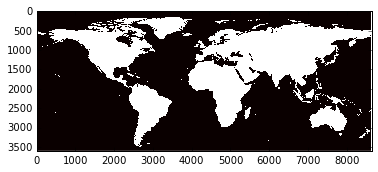

In [69]:
plt.imshow(mask, cmap="hot", interpolation="none")

In [70]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

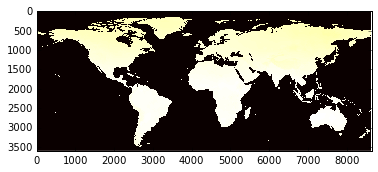

In [72]:
plt.imshow(band, cmap="hot", interpolation="none")

In [85]:
band[band>=0]

array([  0,   2,   2, ..., 195, 179, 196], dtype=int16)

In [86]:
mask[mask>=0]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [87]:
temperature_max_january.data_full.nodatavals

[-9999.0]

In [50]:
# worldclim data
temperature_mean_january = ClimateLayer(file_path="/home/daniela/git/iSDM/data/tmean/tmean_1/w001001.adf")
temperature_mean_january.load_dataset()

Loading data from /home/daniela/git/iSDM/data/tmean/tmean_1/w001001.adf 
Metadata: {'affine': Affine(0.08333333767950535, 0.0, -180.0,
       0.0, -0.08333333767950535, 90.00000782310963),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'AIG',
 'dtype': 'int16',
 'height': 1800,
 'nodata': -32768.0,
 'transform': (-180.0,
               0.08333333767950535,
               0.0,
               90.00000782310963,
               0.0,
               -0.08333333767950535),
 'width': 4320} 
Resolution: (0.08333333767950535, 0.08333333767950535) 
Bounds: BoundingBox(left=-180.0, bottom=-60.0, right=180.0000187754631, top=90.00000782310963) 
Dataset loaded. Use .read() or .read_masks() to access the layers.


<open RasterReader name='/home/daniela/git/iSDM/data/tmean/tmean_1/w001001.adf' mode='r'>

In [51]:
temperature_mean_january.get_data().read(1).shape

(1800, 4320)

In [56]:
temperature_mean_january.reproject(destination_file="./reprojected.tif", resolution=1, dst_crs='EPSG:4326', driver="AIG")

Calculated default transformation:
Affine:
| 1.00, 0.00,-180.00|
| 0.00,-1.00, 90.00|
| 0.00, 0.00, 1.00| 
 width=361, height=151
CPLE_NotSupported in b'GDALDriver::Create() ... no create method implemented for this format.\n'
Reprojected data in ./reprojected.tif 


In [21]:
src = rasterio.open("/home/daniela/git/iSDM/data/tmean/tmean_1/w001001.adf")

In [22]:
src

<open RasterReader name='/home/daniela/git/iSDM/data/tmean/tmean_1/w001001.adf' mode='r'>

In [23]:
from rasterio.warp import calculate_default_transform, RESAMPLING

In [24]:
affine, width, height = calculate_default_transform(src_crs=src.crs,dst_crs=src.crs, width=src.width, height=src.height,left=src.bounds.left,bottom=src.bounds.bottom,right=src.bounds.right,top=src.bounds.top)

In [25]:
affine

Affine(0.08333333767950535, 0.0, -180.0,
       0.0, -0.08333333767950535, 90.00000782310961)

In [26]:
width

4320

In [27]:
height

1800

In [49]:
destination_file="./here.tif"
dst = rasterio.open(destination_file, 'w',driver='GTiff', width=width, height=height, count=src.count, dtype=np.int16)

NameError: name 'width' is not defined

In [29]:
dst

<open RasterUpdater name='./here.tif' mode='w'>

In [48]:
rasterio.warp.reproject(source=rasterio.band(src, 1),
                                            destination=rasterio.band(dst, 1),
                                            src_transform=src.affine,
                                            src_crs=src.crs,
                                            dst_transform=affine,
                                            dst_crs=src.crs
                                            )

NameError: name 'src' is not defined

In [46]:
print(affine)

| 0.08, 0.00,-180.00|
| 0.00,-0.08, 90.00|
| 0.00, 0.00, 1.00|


In [126]:
height

1800

In [47]:
src.indexes

[1]

In [31]:
dst.write(destination_file)

AttributeError: 'str' object has no attribute 'shape'

In [32]:
type(destination_file)

str

In [66]:
# GLOBE DEM DATA
dem_a =  ClimateLayer(file_path="/home/daniela/git/iSDM/data/all10/g10g")

In [67]:
dem_a.load_dataset()

Loading data from /home/daniela/git/iSDM/data/all10/g10g 
Metadata: {'affine': Affine(0.008333333333, 0.0, 5.000002148425331e-13,
       0.0, -0.008333333333, 49.9999999999995),
 'count': 1,
 'crs': {},
 'driver': 'EHdr',
 'dtype': 'int16',
 'height': 6000,
 'nodata': -500.0,
 'transform': (5.000002148425331e-13,
               0.008333333333,
               0.0,
               49.9999999999995,
               0.0,
               -0.008333333333),
 'width': 10800} 
Resolution: (0.008333333333, 0.008333333333) 
Bounds: BoundingBox(left=5.000002148425331e-13, bottom=1.9995098909930675e-09, right=89.99999999640049, top=49.9999999999995) 
Dataset loaded. Use .read() or .read_masks() to access the layers.


<open RasterReader name='/home/daniela/git/iSDM/data/all10/g10g' mode='r'>

In [68]:
the_data = dem_a.get_data().read(1)

In [69]:
the_data.shape

(6000, 10800)

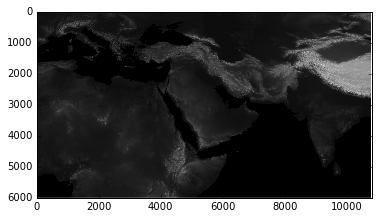

In [70]:
plt.imshow(the_data, cmap="gray", interpolation="none")

In [71]:
the_data[the_data!=-500].min()

-407

In [72]:
dem_a.reproject(destination_file="./here.tif", resolution=1, dst_crs='EPSG:4326')

CPLE_NotSupported in b'No translation for an empty SRS to PROJ.4 format is known.'
CPLE_ObjectNull in b"Pointer 'hTransform' is NULL in 'OCTTransform'.\n"
Calculated default transformation:
Affine:
| 1.00, 0.00, 0.00|
| 0.00,-1.00, 50.00|
| 0.00, 0.00, 1.00| 
 width=90, height=50
Reprojected data in ./here.tif 


In [76]:
dem_a.get_data().shape

(6000, 10800)

In [77]:
dem_a.load_dataset(file_path="./here.tif")

Loading data from ./here.tif 
Metadata: {'affine': Affine(1.0, 0.0, 5.000444502911705e-13,
       0.0, -1.0, 50.0),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'EHdr',
 'dtype': 'int16',
 'height': 50,
 'nodata': -500.0,
 'transform': (5.000444502911705e-13, 1.0, 0.0, 50.0, 0.0, -1.0),
 'width': 90} 
Resolution: (1.0, 1.0) 
Bounds: BoundingBox(left=5.000444502911705e-13, bottom=0.0, right=90.0000000000005, top=50.0) 
Dataset loaded. Use .read() or .read_masks() to access the layers.


<open RasterReader name='./here.tif' mode='r'>

In [78]:
dem_a.get_data().shape # right, updated. Shall I automatically load the new dataset or?

(50, 90)

In [15]:
import rasterio
here = rasterio.open("./here.tif")

In [16]:
here.read().shape

(1, 50, 90)

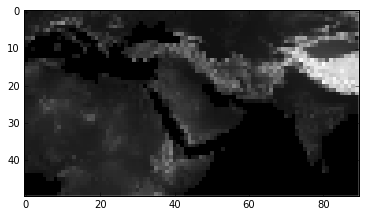

In [18]:
plt.imshow(here.read()[0], cmap="gray", interpolation="none") # 1 pixel here = 1/0.00833km = 120km

In [22]:
dem_a.resolution

(0.008333333333, 0.008333333333)

In [25]:
# same resolution as GLOBE DEM data, they match in QGIS. But driver is different so reprojection fails
#same as with tmean
worldclim_alt =  ClimateLayer(file_path="/home/daniela/git/iSDM/data/alt/alt/w001001.adf") 

In [26]:
worldclim_alt.load_dataset()

Loading data from /home/daniela/git/iSDM/data/alt/alt/w001001.adf 
Metadata: {'affine': Affine(0.008333333767950535, 0.0, -180.0,
       0.0, -0.008333333767950535, 90.00000782310963),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'AIG',
 'dtype': 'int16',
 'height': 18000,
 'nodata': -32768.0,
 'transform': (-180.0,
               0.008333333767950535,
               0.0,
               90.00000782310963,
               0.0,
               -0.008333333767950535),
 'width': 43200} 
Resolution: (0.008333333767950535, 0.008333333767950535) 
Bounds: BoundingBox(left=-180.0, bottom=-60.0, right=180.0000187754631, top=90.00000782310963) 
Dataset loaded. Use .read() or .read_masks() to access the layers.


<open RasterReader name='/home/daniela/git/iSDM/data/alt/alt/w001001.adf' mode='r'>

In [27]:
worldclim_alt.get_data().read().shape

(1, 18000, 43200)

In [28]:
worldclim_alt.resolution

(0.008333333767950535, 0.008333333767950535)

In [39]:
dem_a.reproject(destination_file="./worldclim2.tif", resolution=1, dst_crs='EPSG:4326', driver="AIG")

Calculated default transformation:
Affine:
| 1.00, 0.00, 0.00|
| 0.00,-1.00, 50.00|
| 0.00, 0.00, 1.00| 
 width=90, height=50
Reprojected data in ./worldclim2.tif 


In [40]:
import rasterio
worldclim2 = rasterio.open("./here.tif")

In [46]:
worldclim2.read(1).shape

(50, 90)

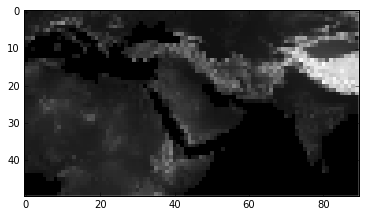

In [42]:
plt.imshow(worldclim2.read()[0], cmap="gray", interpolation="none") # 1 pixel here = 1/0.00833km = 120km

In [65]:
worldclim_alt.get_data().read().max()

8233